## 라이브러리 로딩

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

## 데이터 로딩 및 확인

In [2]:
train = pd.read_csv('bike_datasets/따릉이/train.csv') 
test = pd.read_csv('bike_datasets/따릉이//test.csv')

## 데이터 확인 및 정제 과정 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [13]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [11]:
test.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
count,715.000000,715.000000,714.000000,714.000000,714.000000,714.000000,714.000000,680.000000,678.000000,679.000000
mean,1056.854545,11.472727,23.263305,0.051821,2.388515,56.668067,1359.494398,0.041196,36.930678,24.939617
std,625.574471,6.928427,4.039645,0.221820,1.171270,19.661880,614.171870,0.020656,12.641503,10.075857
min,0.000000,0.000000,14.600000,0.000000,0.000000,16.000000,126.000000,0.003000,9.000000,7.000000
25%,507.000000,5.500000,20.300000,0.000000,1.500000,42.000000,807.250000,0.027000,28.000000,17.000000
50%,1046.000000,11.000000,22.900000,0.000000,2.300000,55.000000,1489.000000,0.039000,35.000000,24.000000
75%,1616.500000,17.000000,26.375000,0.000000,3.275000,73.750000,2000.000000,0.052250,45.000000,31.000000
max,2177.000000,23.000000,33.800000,1.000000,5.900000,100.000000,2000.000000,0.138000,94.000000,69.000000


In [16]:
test['hour'].value_counts()

7     30
23    30
19    30
1     30
0     30
15    30
10    30
11    30
12    30
14    30
3     30
2     30
20    30
8     30
9     30
22    30
6     30
13    30
4     30
17    29
21    29
16    29
5     29
18    29
Name: hour, dtype: int64

In [17]:
test['hour'].unique()

array([ 7, 17, 13,  6, 22,  9, 18,  8, 20,  2, 23, 14,  3, 21, 16,  5, 12,
       11, 10, 15,  0,  1, 19,  4], dtype=int64)

## 결측치 확인 및 처리 

* 결측치 확인 

In [20]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [21]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

* 결측치 채우기 

In [22]:
test.fillna(0, inplace=True)

In [23]:
train.fillna(0, inplace=True)

In [26]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [27]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

## 데이터 시각화

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
train['hour']

0       20
1       13
2        6
3       23
4       18
        ..
1454     4
1455     3
1456     5
1457    21
1458    17
Name: hour, Length: 1459, dtype: int64

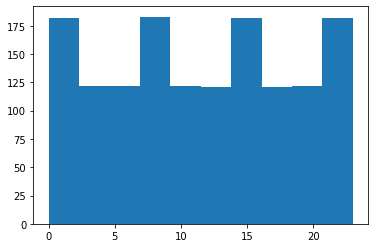

In [31]:
hist=plt.hist(train['hour'], bins=10)

<AxesSubplot:>

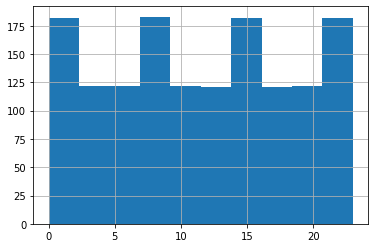

In [33]:
train['hour'].hist(bins=10) #padas에서 호출 

<AxesSubplot:xlabel='hour', ylabel='Count'>

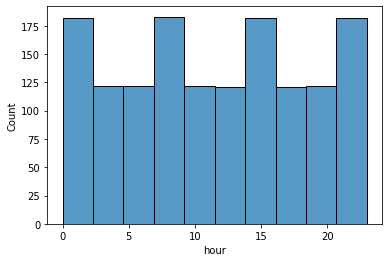

In [45]:
sns.histplot(data=train, x='hour', bins=10) #seaborn에서 호출 

<AxesSubplot:xlabel='hour_bef_temperature', ylabel='Count'>

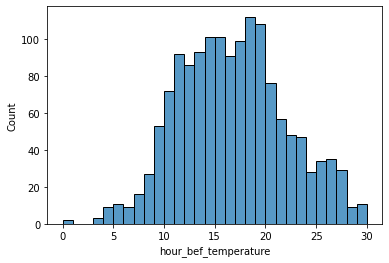

In [43]:
sns.histplot(data=train, x='hour_bef_temperature' , bins=30)

<AxesSubplot:>

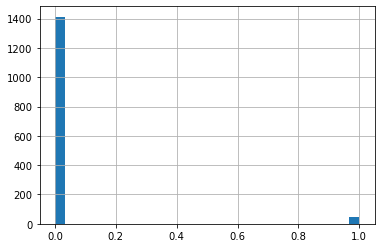

In [49]:
train['hour_bef_precipitation'].hist(bins= 30)

<AxesSubplot:xlabel='hour_bef_windspeed', ylabel='Count'>

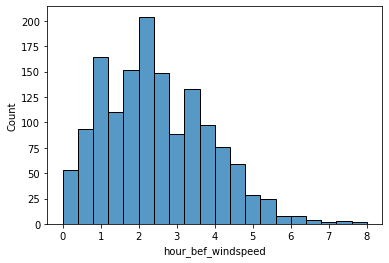

In [52]:
sns.histplot(data=train, x= 'hour_bef_windspeed' , bins=20)

<AxesSubplot:xlabel='hour_bef_visibility', ylabel='Count'>

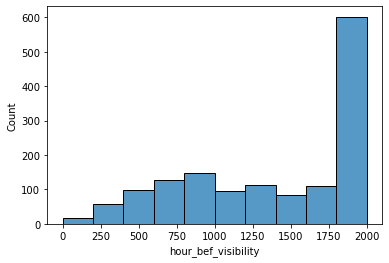

In [55]:
sns.histplot(data=train, x='hour_bef_visibility', bins=10)

* boxplot

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

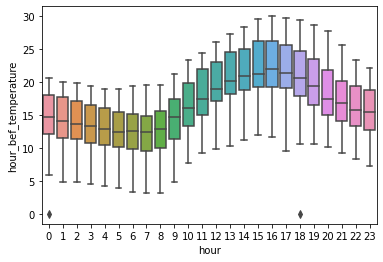

In [61]:
sns.boxplot(data=train, x='hour', y= 'hour_bef_temperature')  #배운걸 일부러 쓰려했으나 시각화 자료로 맞지 않음 

* violinplot

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

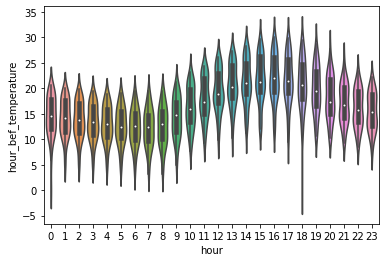

In [70]:
sns.violinplot(data=train, x='hour', y='hour_bef_temperature')

* countplot

<AxesSubplot:xlabel='hour_bef_windspeed', ylabel='count'>

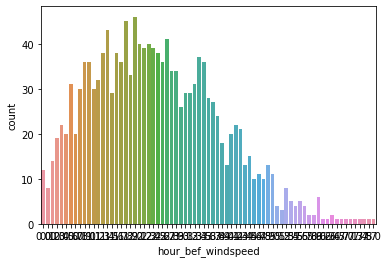

In [73]:
sns.countplot(data=train, x='hour_bef_windspeed') # hist가 가시성이 더 좋은 것 같음 

* piechart

In [76]:
data= train['hour_bef_windspeed'].value_counts()  #범주형 데이터가 아니기 때문에 가시화 어렵게 느껴짐 

<AxesSubplot:ylabel='hour_bef_windspeed'>

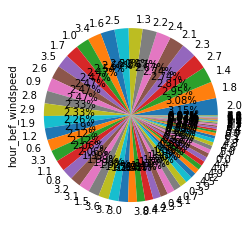

In [77]:
data.plot(kind='pie', autopct='%.2f%%') 

## 데이터 관계 시각화

In [81]:
corr = train.corr()

<AxesSubplot:>

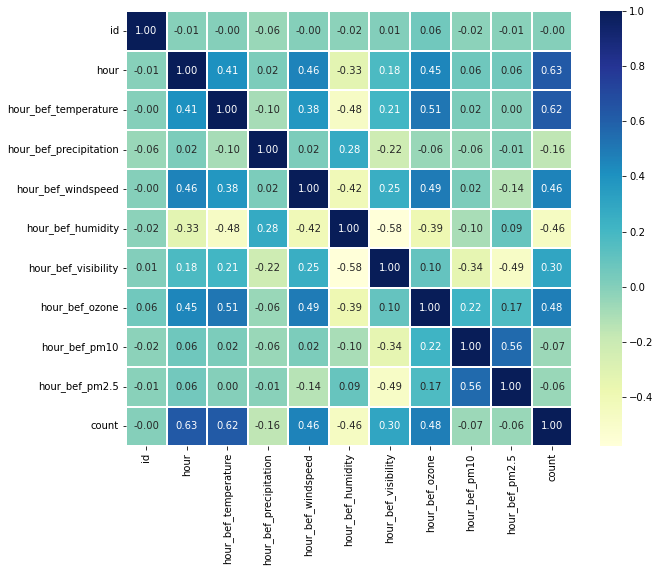

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu', linewidth=2)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

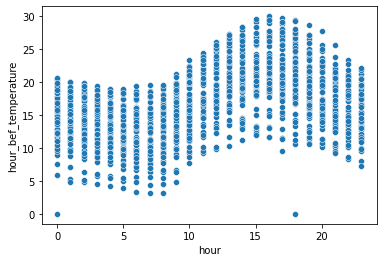

In [90]:
sns.scatterplot(data=train, x='hour', y='hour_bef_temperature') # 날씨와 이용 시간의 상관 관계 

<AxesSubplot:xlabel='hour', ylabel='hour_bef_temperature'>

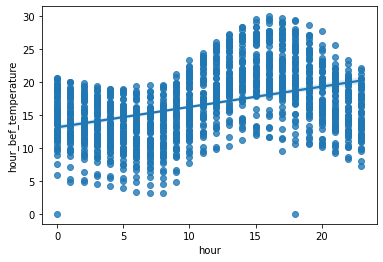

In [92]:
sns.regplot(data=train, x='hour', y='hour_bef_temperature') #해당 관계는 regplot으로 시각화가 잘 되지 않음 

## 모델 정의 및 학습

In [11]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']

In [12]:
model=RandomForestRegressor(n_estimators=100)
model.fit(train_x,train_y)

RandomForestRegressor()

## 학습 된 모델로 예측 데이터 생성

In [13]:
pred = model.predict(test)

## 제출파일 생성

In [14]:
submission = pd.read_csv('/content/data/submission.csv')
submission

FileNotFoundError: [Errno 2] No such file or directory: '/content/data/submission.csv'

In [29]:
submission['count'] = pred

In [30]:
submission

,id,count
0,0,90.84
1,1,244.33
2,2,85.47
3,4,29.88
4,5,67.84
...,...,...
710,2148,54.60
711,2149,62.59
712,2165,125.78
713,2166,149.53


In [31]:
submission.to_csv('베이스라인.csv',index = False)